# Laboratorio de regresión logística

|                |   |
:----------------|---|
| **Nombre**     |  Isabela Torres Septien Uribe |
| **Fecha**      |  05/10/2025 |
| **Expediente** |   730667| 

La regresión logística es una herramienta utilizada para predecir respuestas cualitativas. Al igual que la regresión lineal, es un método sencillo que sirve como un punto de partida para técnicas más avanzadas. Por ejemplo, lo que se conoce como *redes neuronales* o *red de perceptrones multicapa* no es más que una estructura de regresiones logísticas que se alimentan entre sí.

1. Descarga el archivo de créditos y carga los datos (Default.csv). Utiliza `pandas`.

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv("Default.csv")

2. Utiliza el comando `obj.head()`, donde `obj` es el nombre que le diste a los datos del archivo.

In [5]:
df.head()

,default,student,balance,income
0,No,No,729.526495,44361.625074
1,No,Yes,817.180407,12106.134700
2,No,No,1073.549164,31767.138950
3,No,No,529.250605,35704.493940
4,No,No,785.655883,38463.495880


El comando head arroja los primeras *n* líneas (por defecto 5) de los datos que están en el DataFrame.

3. Utiliza el comando `obj.describe()`.

In [6]:
df.describe()

,balance,income
count,10000.000000,10000.000000
mean,835.374886,33516.981876
std,483.714985,13336.639563
min,0.000000,771.967729
25%,481.731105,21340.462903
50%,823.636973,34552.644802
75%,1166.308386,43807.729275
max,2654.322576,73554.233500


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   default  10000 non-null  object 
 1   student  10000 non-null  object 
 2   balance  10000 non-null  float64
 3   income   10000 non-null  float64
dtypes: float64(2), object(2)
memory usage: 312.6+ KB


El comando describe toma las columnas que tienen datos numéricos y saca datos estadísticos comunes:
- *n*
- media
- desviación estándar
- valor mínimo
- primer cuartil
- mediana
- tercer cuartil
- valor máximo

3. Vistos estos datos, ¿qué columnas existen en el DataFrame? ¿Qué tipo de datos contienen?

En mi dataframe existen 4 columnas que tienen las siguientes caracrteristicas  
- default- tipo de datos, es un objeto variables de yes, No
- student- tipo de datos, es un objeto Variables de yes, No
- balance- tipo de datos, es una variable float64, de estos datos si se pueden calcular los datos estadisticos
- income- tipo de datos, es una variable float64, de estos datos si se calculan los datos estadisticos 

4. Configura el tipo de dato de las columnas `default` y `student` para cambiarlos a variables categóricas.

`data[columna] = data[columna].astype("category")`

In [8]:
df['default']  = df['default'].astype('category')
df['student']  = df['student'].astype('category')

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   default  10000 non-null  category
 1   student  10000 non-null  category
 2   balance  10000 non-null  float64 
 3   income   10000 non-null  float64 
dtypes: category(2), float64(2)
memory usage: 176.2 KB


Imagina que trabajas en un banco y que se te entregan estos datos. Tu objetivo es crear un modelo que ayude a predecir si una persona que solicita un crédito lo va a pagar. Exploremos los datos un poco más antes de crear un modelo.

Veamos primero cómo es la distribución de los valores cuando una persona dejó de pagar y cuando siguió pagando. `Default` es el término utilizado para cuando una persona dejó de pagar.

5. Crea una gráfica de caja para las columnas `income` y `balance`, con los datos agrupados con la columna `default`. Utiliza el comando `obj.boxplot(column=____, by=_____)`

<Axes: title={'center': 'income'}, xlabel='default'>

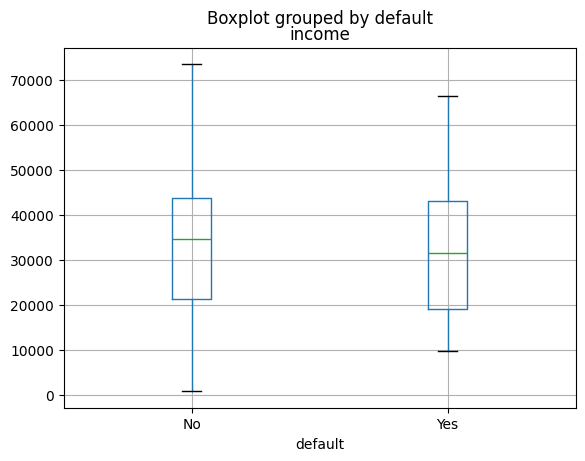

In [10]:
df.boxplot(column = 'income', by='default')

<Axes: title={'center': 'balance'}, xlabel='default'>

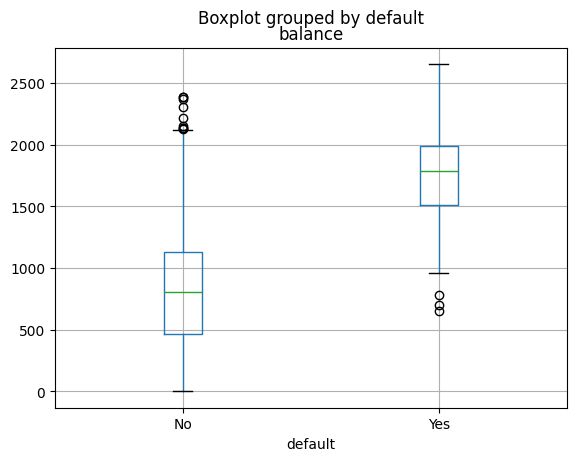

In [11]:
df.boxplot(column = 'balance', by='default')

6. Crea una gráfica de dispersión donde el eje *x* sea la columna `balance` y el eje *y* la columna `income`. Utiliza el comando `obj.plot.scatter(x, y, c="default", colormap="PiYG_r", alpha=0.5)`.

Text(0.5, 1.0, 'Balance vs Income colored by Default')

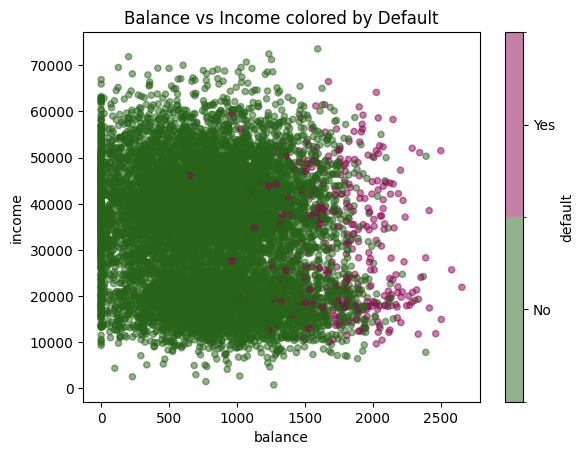

In [12]:
df.plot.scatter('balance', 'income', c="default", colormap="PiYG_r", alpha=0.5)
plt.title('Balance vs Income colored by Default')

La regresión (lineal o logística) se usa para encontrar una línea que ajuste los datos para tomar una decisión. La línea que buscamos en regresión logística es aquella que nos ayude a separar las diferentes categorías. 

<img style="float: left; " src="https://www.baeldung.com/wp-content/uploads/sites/4/2023/10/decision_boundary_curve.jpg" width="400px" />


## Regresión logística simple

Creemos un modelo simple donde sólo utilizamos una de los factores para predecir una respuesta. Quiero conocer la probabilidad de que una persona deje de pagar su crédito dado el balance que tiene en su cuenta.

$$ P(\text{default}=\text{Yes}|\text{balance}) $$

Por el momento la columna default no contiene valores numéricos, por lo que hay que transformar los datos. Como default es nuestra variable de respuesta (lo que queremos predecir) podemos nombrarla *y*.

Ejecuta el código `y = obj["default"] == "Yes"`. Extrae el factor `balance` en una variable *x*.

In [13]:
y = df['default'] == 'Yes'

In [14]:
x = df['balance']

Crea un gráfico de dispersión donde el eje *x* sea `balance` y el eje *y* sea `default` transformado.

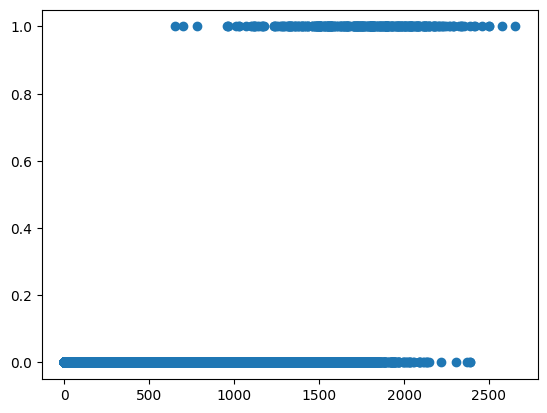

In [20]:
plt.scatter(x,y)

La línea que utilizaremos para predecir la probabilidad es:

$$ p(x) = \frac{1}{1 + e^{-(\beta_0 + \beta_1 x)}} $$

Para nuestro ejemplo de pagos y balance:

$$ P(\text{default}=1|\text{balance}) = \frac{1}{1 + e^{-(\beta_0 + \beta_1  \text{balance})}} $$

Buscamos maximizar la probabilidad de que el modelo tome decisiones correctas. Es decir, que cuando `default` fue verdadero, que la predicción sea 100%, y que cuando `default` fue falso que la predicción sea 0%.

$$ \Pi_{i:y_i=1} p(x_i) \Pi_{i':y_{i'}} (1-p(x_{i'})) $$

La función de costo ya simplificada es la siguiente:

$$ J(\vec{\beta}) = -  \sum_{i=1}^n{[y_i \ln{(\hat{p}(x_i))} + (1-y_i)\ln{(1 - \hat{p}(x_i))}]}$$

Utiliza la clase `LogisticRegression` del módulo `linear_model` de la librería `sklearn` para estimar los parámetros del modelo.

In [22]:
from sklearn.linear_model import LogisticRegression

In [24]:
model = LogisticRegression()
model.fit(x.values.reshape(-1,1), y)
B0 = model.intercept_
B1 = model.coef_
B0, B1

(array([-10.65132824]), array([[0.00549892]]))

Muchos aspectos de la regresión logística son similares a la regresión lineal. Podemos medir la precisión de nuestros estimados calculando sus errores estándar. El objetivo de calcular estos errores es asegurar que hay una relación estadísticamente significativa entre el factor y la variable de respuesta.

Los errores estándar se obtienen con el siguiente procedimiento:

1. Calcula las predicciones utilizando los $\beta_0$ y $\beta_1$ encontrados.

In [31]:
%pip install statsmodels
import statsmodels.api as sm

   ---------------------------------------- 0.0/9.6 MB ? eta -:--:--
   ---------------------------------------- 0.0/9.6 MB ? eta -:--:--
   ---------------------------------------- 0.0/9.6 MB 435.7 kB/s eta 0:00:22
   ---------------------------------------- 0.1/9.6 MB 744.7 kB/s eta 0:00:13
    --------------------------------------- 0.2/9.6 MB 1.3 MB/s eta 0:00:08
   - -------------------------------------- 0.5/9.6 MB 2.1 MB/s eta 0:00:05
   -- ------------------------------------- 0.6/9.6 MB 2.3 MB/s eta 0:00:04
   ---- ----------------------------------- 1.1/9.6 MB 3.5 MB/s eta 0:00:03
   -------- ------------------------------- 2.1/9.6 MB 5.9 MB/s eta 0:00:02
   --------------- ------------------------ 3.6/9.6 MB 8.9 MB/s eta 0:00:01
   --------------------- ------------------ 5.1/9.6 MB 11.1 MB/s eta 0:00:01
   ---------------------------------- ----- 8.4/9.6 MB 16.7 MB/s eta 0:00:01
   -------------------------------------- - 9.2/9.6 MB 17.8 MB/s eta 0:00:01
   ----------------


[notice] A new release of pip is available: 24.0 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [33]:
import statsmodels.api as sm


x_const = sm.add_constant(x)
model = sm.Logit(y, x_const).fit()
model.summary()



Optimization terminated successfully.
         Current function value: 0.079823
         Iterations 10


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                default   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9998
Method:                           MLE   Df Model:                            1
Date:                Sun, 05 Oct 2025   Pseudo R-squ.:                  0.4534
Time:                        22:21:03   Log-Likelihood:                -798.23
converged:                       True   LL-Null:                       -1460.3
Covariance Type:            nonrobust   LLR p-value:                6.233e-290
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        -10.6513      0.361    -29.491      0.000     -11.359      -9.943
balance        0.0055      0.000     24.952      0.000       0.005       0.006
==============================================================================

Possibly complete quasi-separation: A fraction 0.13 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

2. Idealmente la probabilidad debería ser 100% o 0%. Si alguna predicción no fue absoluta significa que hay incertidumbre. Calcula $p(1-p)$ para todas tus predicciones.

In [37]:
p_hat = model.predict(x_const)
p = p_hat*(1-p_hat)
p

0       0.001304
1       0.002108
2       0.008521
3       0.000434
4       0.001774
          ...   
9995    0.001182
9996    0.001524
9997    0.002460
9998    0.103127
9999    0.000071
Length: 10000, dtype: float64

3. Crea una matriz vacía y llena la diagonal con las probabilidades encontradas.

`V = np.diagflat(*p(1-p)*)`

In [ ]:
V = np.diagflat(p)
V

array([[1.30397487e-03, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 2.10813185e-03, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 8.52087095e-03, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       ...,
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        2.46042929e-03, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 1.03126806e-01, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 7.14423928e-05]],
      shape=(10000, 10000))

4. Calcula la matriz de covarianza. (Dado que X es la matriz que contiene todos los factores)

`cov = np.linalg.inv(X.T @ V @ X)`

In [ ]:
cov = np.linalg.inv(x_const.T @ V @ x_const)
cov

array([[ 1.30442848e-01, -7.81757783e-05],
       [-7.81757783e-05,  4.85656859e-08]])

5. Los valores en la diagonal de la matriz de covarianza corresponden a la varianza de los factores. Utiliza los valores de la diagonal para calcular el error estándar.

`se = np.sqrt(np.diag(cov))`

In [ ]:
se = np.sqrt(np.diag(cov))
se

array([3.61168725e-01, 2.20376237e-04])

Ahora, revisemos si los estimados de nuestros coeficientes demuestran que hay una relación significativa entre los factores y la respuesta.

Calculamos el estadístico *z*

$$ z_j = \frac{\hat{\beta_j}}{\text{SE}(\hat{\beta_j})} $$

In [43]:
betas = model.params.values

In [44]:
Z = betas / se
Z

array([-29.49128725,  24.95240415])

Utilizamos el estadístico *z* para encontrar el *p-value*.

`from scipy.stats import norm`

`p_value = 2 * (1 - norm.cdf(abs(z_statistic)))`

In [45]:
from scipy.stats import norm

In [48]:
p_values = 2*(1 - norm.cdf(abs(Z)))
p_values

array([0., 0.])

¿Es significativa la relación de los factores con la variable de respuesta?

Se puede decir que la relacion del factor balance si tiene una relación directa con mi y ya que, el p_values es muy bajo por lo tanto esta variable si es significativa

Repite el procedimiento con el factor `student`. 
1. Transforma el factor de {"Yes", "No"} a {1, 0}.
2. Estima los coeficientes. 
3. Calcula el error estándar de tus estimaciones.
   1. Usa tu modelo para encontrar $\hat{p}(X)$
   2. Calcula el error $p(1-p)$
   3. Calcula la matriz de covarianza
   4. Extrae el error estándar
5. Argumenta si los factores son significativos utilizando el *p-value*.
   1. Utiliza el error estándar para calcular el estadístico *z*
   2. Calcula el *p-value*
   3. ¿Son significativos?


In [52]:

#1. Transformar el factor de yes con student con valores binarios
X = (df['student'] == 'Yes').astype(int)
y = (df['default'] == 'Yes').astype(int)

In [53]:
#Estimar los coeficientes de la regresión logística
model = LogisticRegression()
model.fit(x.values.reshape(-1,1), y)
B0 = model.intercept_
B1 = model.coef_
B0, B1

(array([-10.65132824]), array([[0.00549892]]))

In [54]:
#Calcular el error estandar de tus estimaciones
import statsmodels.api as sm

x_const = sm.add_constant(X)
model = sm.Logit(y, x_const).fit()
model.summary()

Optimization terminated successfully.
         Current function value: 0.145434
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                default   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9998
Method:                           MLE   Df Model:                            1
Date:                Sun, 05 Oct 2025   Pseudo R-squ.:                0.004097
Time:                        22:42:43   Log-Likelihood:                -1454.3
converged:                       True   LL-Null:                       -1460.3
Covariance Type:            nonrobust   LLR p-value:                 0.0005416
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -3.5041      0.071    -49.554      0.000      -3.643      -3.366
student        0.4049      0.115      3.520      0.000       0.179       0.630
==============================================================================
"""

In [ ]:
#Encontrar p_hat(X), Calcula el error $p(1-p)$

p_hat = model.predict(x_const)
p = p_hat*(1-p_hat)
p


0       0.028343
1       0.041278
2       0.028343
3       0.028343
4       0.028343
          ...   
9995    0.028343
9996    0.028343
9997    0.028343
9998    0.028343
9999    0.041278
Length: 10000, dtype: float64

In [59]:
#Calcula la matriz de covarianza
V = np.diagflat(p)
cov = np.linalg.inv(x_const.T @ V @ x_const)
cov

array([[ 0.00500035, -0.00500035],
       [-0.00500035,  0.01322936]])

In [60]:
#Calcula el error estándar
se = np.sqrt(np.diag(cov))
se

array([0.07071318, 0.11501894])

In [61]:
#Utiliza el error estándar para calcular el estadístico *z*

z = model.params.values / se
z

array([-49.55409422,   3.52017732])

In [62]:
#Calcula el *p-value*
p_values = 2*(1 - norm.cdf(abs(z)))
p_values

array([0.        , 0.00043126])

Los siguientes valore siguen siendo muy significativos ya que tiene los p_values muy bajor por lo tanto los seguimos usando en nuestra regresión logistica

## Regresión logística múltiple

Considera ahora el caso de múltiples factores. Intentemos predecir si la persona dejará de pagar su crédito utilizando toda la información que tenemos disponible. I.e.

$$ P(\text{default}=1|\text{balance}, \text{income}, \text{student}) = \frac{1}{1 + e^{-(\beta_0 + \beta_1  \text{balance} + \beta_2 \text{income} + \beta_3 \text{student})}} $$

1. Utiliza `LogisticRegression` para estimar los coeficientes.
2. Calcula el error estándar de tus estimaciones.
3. Argumenta si los factores son significativos utilizando el *p-value*. 

In [ ]:
from sklearn.linear_model import LogisticRegression

In [65]:
X = df[['balance', 'income']].copy()
X['student'] = (df['student'] == 'Yes').astype(int)
y = (df['default'] == 'Yes').astype(int)

In [ ]:
model = LogisticRegression()
model.fit(X, y)
B0 = model.intercept_
B1 = model.coef_
B0, B1

(array([-10.9018074]),
 array([[ 5.73061148e-03,  3.96161035e-06, -6.12573129e-01]]))

In [69]:
#Calcular el error estandar de las estimaciones
import statsmodels.api as sm
x_const = sm.add_constant(X)
model = sm.Logit(y, x_const).fit()
model.summary()

Optimization terminated successfully.
         Current function value: 0.078577
         Iterations 10


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                default   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9996
Method:                           MLE   Df Model:                            3
Date:                Sun, 05 Oct 2025   Pseudo R-squ.:                  0.4619
Time:                        22:56:44   Log-Likelihood:                -785.77
converged:                       True   LL-Null:                       -1460.3
Covariance Type:            nonrobust   LLR p-value:                3.257e-292
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        -10.8690      0.492    -22.079      0.000     -11.834      -9.904
balance        0.0057      0.000     24.737      0.000       0.005       0.006
income      3.033e-06    8.2e-06      0.370      0.712    -1.3e-05    1.91e-05
student       -0.6468      0.236     -2.738      0.006      -1.110      -0.184
==============================================================================

Possibly complete quasi-separation: A fraction 0.15 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

**Argumenta si los factores son significativos usando p_value**  
La grán mayoría de los modelos son significativos sin embargo el income es el único modelo que no es significativo porque mi p_value, es de 0.712. Volviendolo irrelevante

¿Cómo sabemos qué tan bueno es el modelo? Hay cuatro posibles casos para un problema de clasificación simple:
- Era sí y se predijo sí. (Verdadero positivo **TP**)
- Era sí y se predijo no. (Falso negativo **FN**)
- Era no y se predijo sí. (Falso positivo **FP**)
- Era no y se predijo no. (Verdadero negativo **TN**)

De esos cuatro casos hay dos donde el modelo es correcto y dos donde el modelo no es correcto.

![](https://miro.medium.com/v2/resize:fit:720/format:webp/1*IuymDnZpRlkat0qejE26Nw.png)

1. Menciona dos ejemplos donde consideres que un falso positivo sea un peor resultado que un falso negativo.

Cuando tienes una deuda y te marca que ya la pagaste pero en realidad no la haz pagado por lo tanto, te genera intereses ya que, en realidad sigues debiendo dinero

Cuando estas desarrollando un medicamento y ya te dice tu prueba que es apto para el público pero en realidad todavia no es apto para el publico por lo que hay efectos adversos

Cuando estas limpiando un rio contaminado y haces una prueba y te dice que ya es apto para el público nadar y en realidad no lo es por lo tanto, se enferman los que se meten a nadar

2. Menciona dos ejemplos donde consideres que un falso negativo sea un peor resultado que un falso positivo.

Uno de los ejemplos de este caso sería en la medicina en el cual se quiere ver si tienes una enfermedad o no ya que el paciente está enfermo, y al momento de realizar la prueba de x enfrendad te da un falso negativo cuando en realidad si tenias la enfermedad x

Estas desarrollando un pesticida y quieres ver si no contamina el medio ambiente y te aparece que es negativo, la gente lo usa sin saber que estas contaminando el subsuelo y se envenena lo cosecha por culpa de ese pesticida por ese elemento contaminante

## Referencia

James, G., Witten, D., Hastie, T., Tibshirani, R.,, Taylor, J. (2023). An Introduction to Statistical Learning with Applications in Python. Cham: Springer. ISBN: 978-3-031-38746-3